In [1]:
# importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
# getting the data.
df= pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# getting the basic information about the columns and their data-type.
df.info()

# there are three columns namely 'Date' and 'type' and 'region' which have object datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
# dropping the 'Unnamed: 0' column as it is nominal data.
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
# checking for duplicate entries.
df.duplicated().value_counts()
# didn't find any.

False    18249
dtype: int64

In [6]:
# applying the 'to_datetime' method of pandas to convert the 'Date' column into date-time format.
df['Date'] = pd.to_datetime(df['Date'],format ='%Y-%m-%d', dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
# extracting the month and day from the 'Date' column and making separate columns for them.
# the year is not extracted as there is already a separate column for year.
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [9]:
# dropping the 'Date' column as the day,month and year are extracted now to separate columns.
df.drop(columns='Date',inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [10]:
# checking for any null values column-wise.
df.isnull().sum()
# didn't find any.

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [11]:
# The 'Total Volume' column includes the volume of PLU 4046,PLU 4225,PLU 4770 too. 
# Hence let's substract their volume from the total and make a column for other types of avocado and call it "Type4 Volume"

df['Total Volume']= df['Total Volume'] - (df['4046']+df['4225']+df['4770'])
df.rename(columns = {'Total Volume':'Type4 Volume'}, inplace = True)
df.drop(columns=['Total Bags'],inplace=True)
df.head()

,AveragePrice,Type4 Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,8696.87,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,9505.56,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,8145.35,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,5811.16,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,6183.95,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [12]:
# checking the years for which our dataset is.
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [13]:
# checking the types of avocados mentioned in our dataset.
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [14]:
# Let's encode the two object data-type columns using label-encoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

df["region"]= enc.fit_transform(df["region"])
df["type"]= enc.fit_transform(df["type"])
df.head()

,AveragePrice,Type4 Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,8696.87,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,9505.56,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,8145.35,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,5811.16,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,6183.95,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,11,29


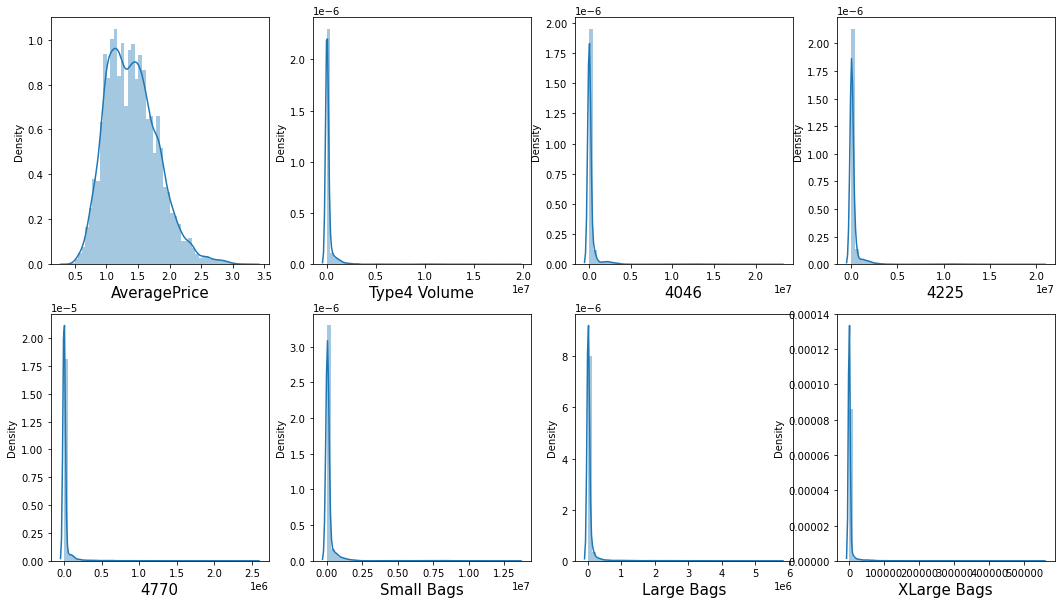

In [15]:
# let's see a basic ditribution overview of the continuous-data columns that we have.
plt.figure(figsize=(18,10))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# There is right-skewness in almost all of our continuous-data columns.

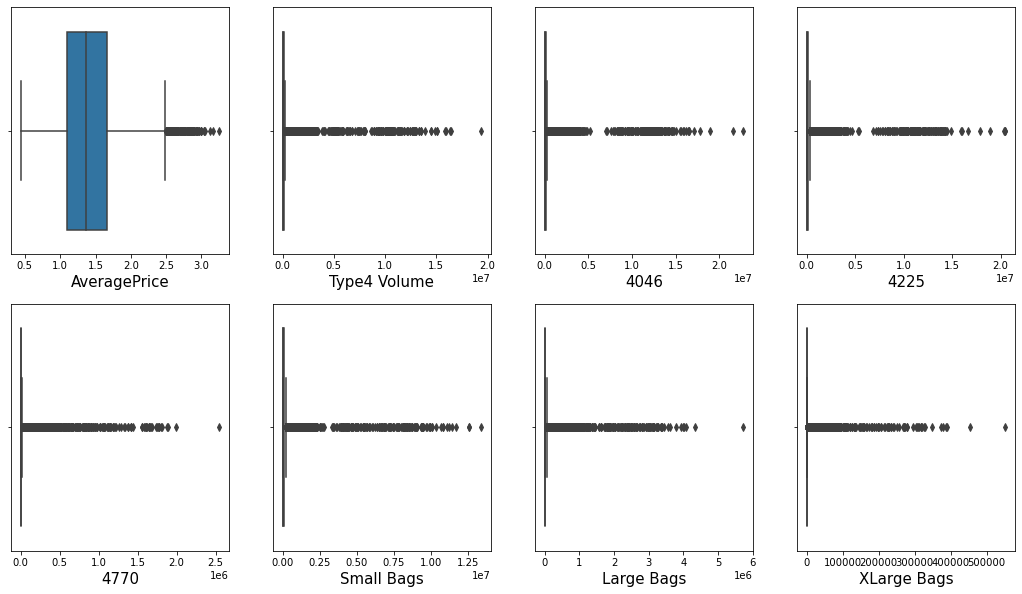

In [16]:
# Let's see the box-plot of the above columns to see the condition in outliers front.
plt.figure(figsize=(18,10))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax= plt.subplot(2,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# There seems to be a lot of values outside the normal range of our data-distribution. 

In [17]:
# Removing outliers using z-score.

from scipy.stats import zscore
z_score= zscore(df[['Type4 Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']])
abs_zscore= np.abs(z_score)
filtering_entry= (abs_zscore<3).all(axis=1)
df=df[filtering_entry]
df.shape

(17782, 13)

In [18]:
df.describe().T
# If we see the standard-deviation and compare with the mean then it can be said that there is a lot of skewness in the data.

,count,mean,std,min,25%,50%,75%,max
AveragePrice,17782.0,1.415546,0.402278,4.400000e-01,1.1100,1.380,1.6700,3.25
Type4 Volume,17782.0,128892.418071,281274.788010,-4.547474e-13,4846.4550,36715.810,101271.4000,2782725.46
4046,17782.0,153517.665047,438150.744096,0.000000e+00,804.3150,7514.895,97139.0475,4085858.78
4225,17782.0,164423.980322,397866.008607,0.000000e+00,2877.7725,26038.625,127179.5375,3894801.66
4770,17782.0,11078.541716,34373.958145,0.000000e+00,0.0000,158.285,5175.3225,344488.51
Small Bags,17782.0,99902.172097,228821.744754,0.000000e+00,2636.4425,23953.545,77803.1675,2348867.54
Large Bags,17782.0,27640.732102,72791.402335,0.000000e+00,109.0150,2402.420,18809.8475,781447.29
XLarge Bags,17782.0,1347.377066,5222.289928,0.000000e+00,0.0000,0.000,70.2925,55940.33
type,17782.0,0.513047,0.499844,0.000000e+00,0.0000,1.000,1.0000,1.00
year,17782.0,2016.141098,0.939273,2.015000e+03,2015.0000,2016.000,2017.0000,2018.00


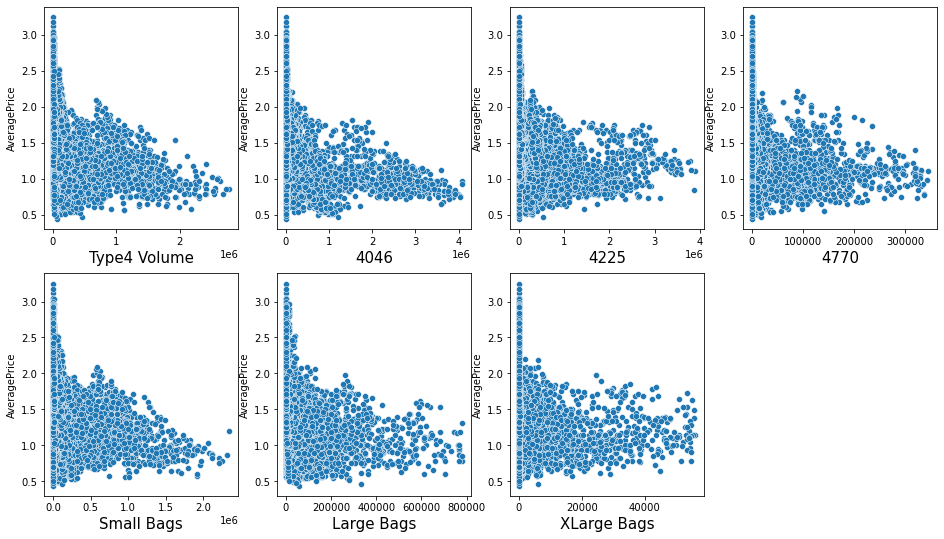

In [19]:
# Let's see the scatterplot of our continuous-data columns with our target variable('AveragePrice')
columns= df[['Type4 Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']]
plt.figure(figsize=(16,9))
plotnumber=1
for i in columns:
    if plotnumber<=8:
        ax= plt.subplot(2,4,plotnumber)
        sns.scatterplot(x=columns[i],y=df['AveragePrice'])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

# There doesn't seem to be any direct strong relation of 'AveragePrice' with the volume of avocados sold or no. of bags sold.
# The sharp vertical line of dots close to the 0 volume shows that some avocados are sold at much higher rate than others even though their volume of sales is less.

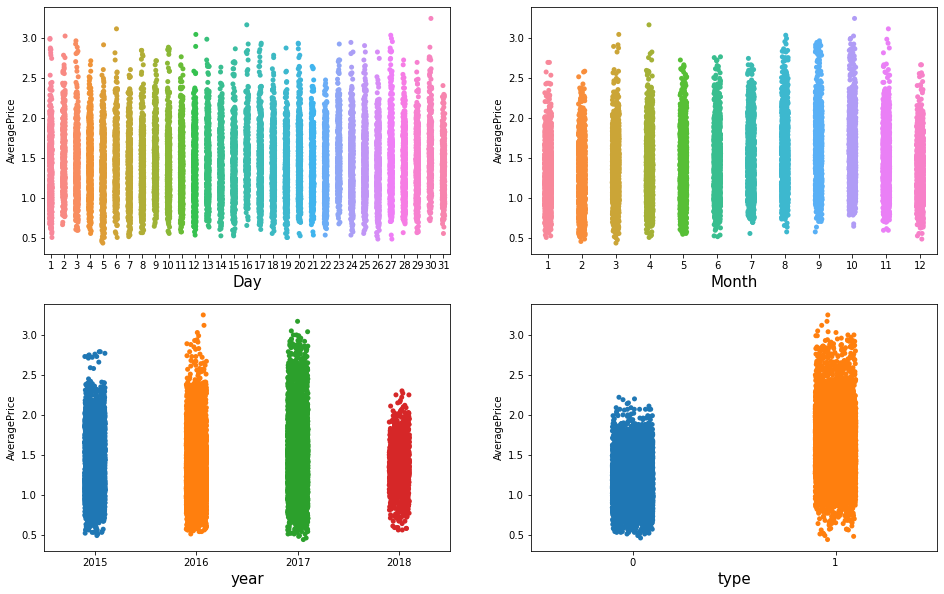

In [20]:
# Let's see the stripplot of our 'Day','Month', 'year' and 'type' columns with our target variable('AveragePrice')
columns= df[['Day','Month','year','type']]
plt.figure(figsize=(16,10))
plotnumber=1
for i in columns:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.stripplot(x=columns[i],y=df['AveragePrice'])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

# years 2016 and 2017 were better years for the avocado vendors as compared to 2015 and 2018 as the average price touched higher levels.
# organic(type 1) avocados have a higher average price than the conventional ones.

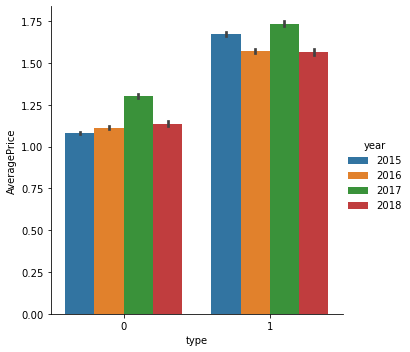

In [21]:
# Let's see the plot of 'type' vs 'AveragePrice' with 'year' used for color encoding.
sns.catplot(x="type", y="AveragePrice",hue="year",kind="bar", data=df)

# It can be said that the average price of organic(type 1) avocado is higher in all the years in our dataset.

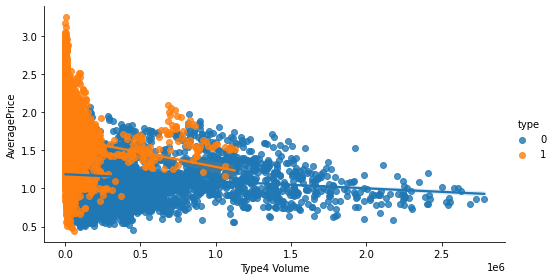

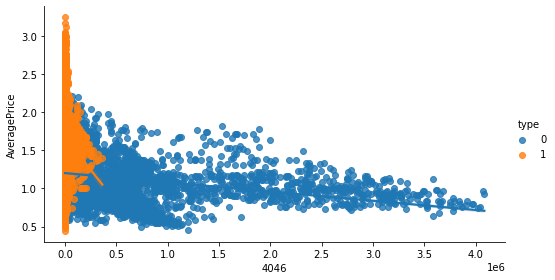

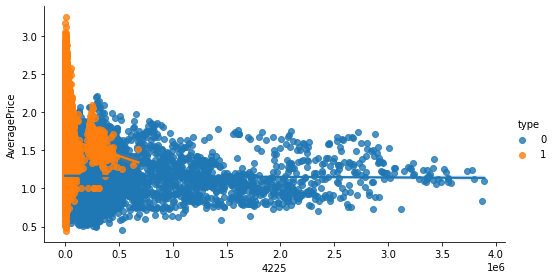

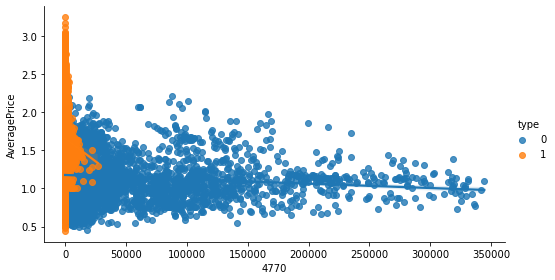

In [22]:
# Let's see the plot of different kind of avocados(4046, 4225, etc) vs 'AveragePrice' with 'type' used for color encoding.
x= df[['Type4 Volume','4046','4225','4770']]
for i in x:
    sns.lmplot(x=i, y="AveragePrice", hue="type", data=df, height=4, aspect=18/10)
     
# From the plots it can be seen that in all kinds of avocados the organic type of the variant only sells at a price of $2.5 or higher.
# If we compare the volume of sales then the sale of organic type is much less as compared to the conventional type.
# Some organic avocados in 'Type4 Volume' shows better sales in terms of volume when we compare it with other types(4046,4225,4770)

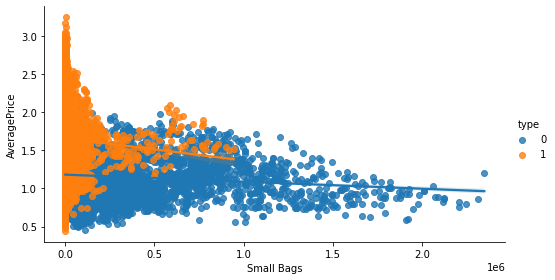

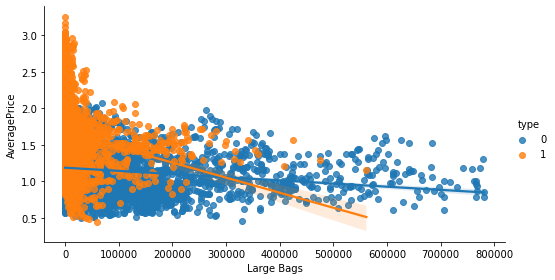

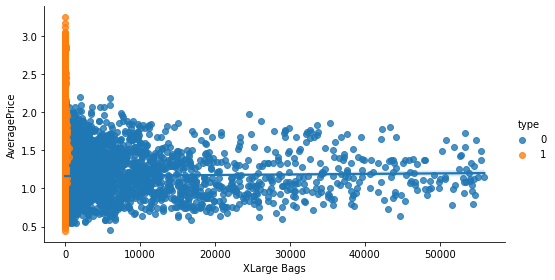

In [23]:
# Let's see the plot of different kind of avocado bags(Small, Large, Xlarge) vs 'AveragePrice' with 'type' used for color encoding.
x= df[['Small Bags','Large Bags','XLarge Bags']]
for i in x:
    sns.lmplot(x=i, y="AveragePrice", hue="type", data=df, height=4, aspect=18/10)
    
# From the plots it can be seen that the sale of conventional avocado(type 0) bags is more as compared to organic ones(type 1)
# In the 'XLarge Bags' category the sales are highly in favor of the conventional types.

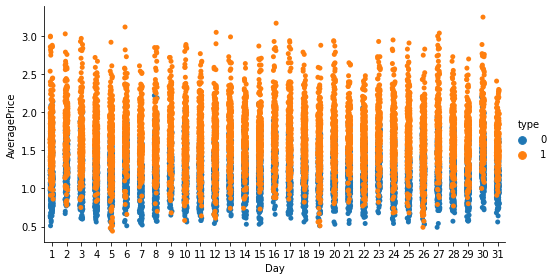

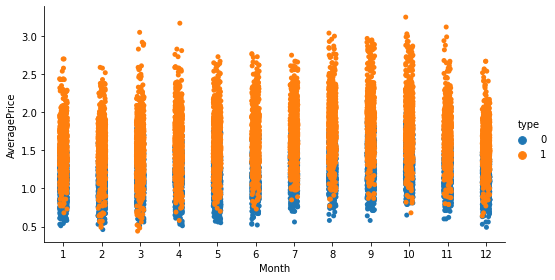

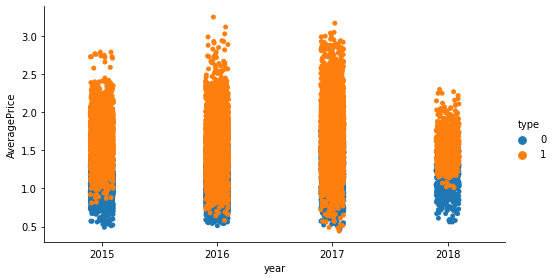

In [24]:
# Let's see the plot of 'Day','Month' and 'year' vs 'AveragePrice' with 'type' used for color encoding.
x= df[['Day','Month','year']]
for i in x:
    sns.catplot(x=i, y="AveragePrice", hue="type", data=df, height=4, aspect=18/10)

<AxesSubplot:>

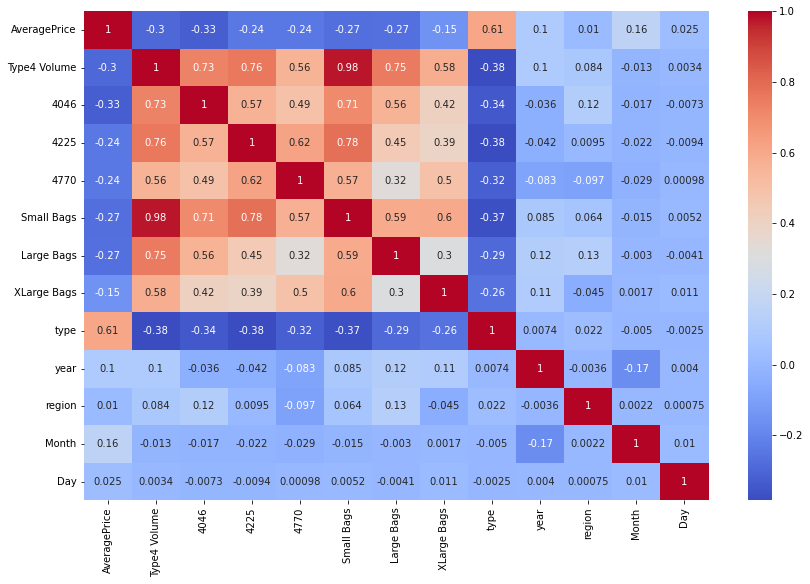

In [25]:
# Let's see the correlation heat-map.
corr= df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# 'Type4 Volume' and 'Small Bags' seems to have a strong correlation.
# 'Type4 Volume' might have correlation with '4046','4225' and '4770' columns.
# '4046' column might have correlation with '4225' and '4770' and 'Small Bags' columns.
# '4225' column might have correlation with '4770' and 'Small Bags' columns.

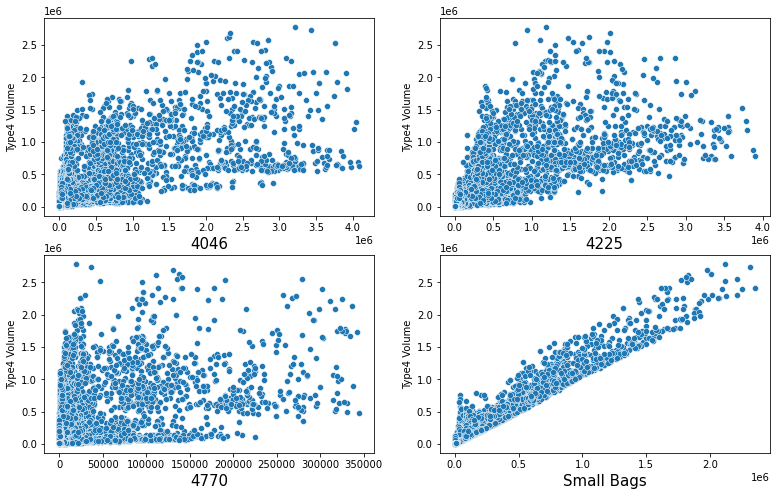

In [26]:
# Let's see the scatterplot of 'Type4 Volume' vs '4046','4225','4770' and 'Small Bags' columns.
columns= df[['4046','4225','4770','Small Bags']]
plt.figure(figsize=(13,8))
plotnumber=1
for i in columns:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.scatterplot(x=columns[i],y=df['Type4 Volume'])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

# 'Small Bags' column have a strong positive relation with 'Type4 Volume'. Maybe we have a multicollinearity problem. We have to check the vif score and take action accordingly.
# '4046','4225' and '4770' columns also have a positive relation with 'Type4 Volume' but weak as compared to 'Small Bags'.

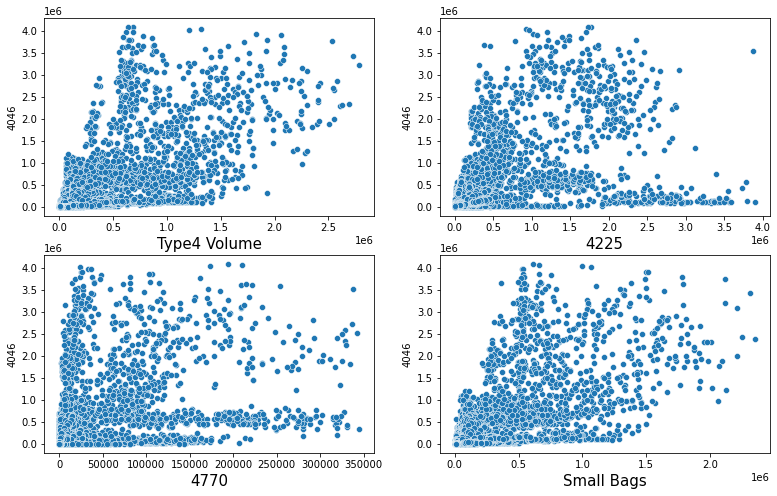

In [27]:
# Let's see the scatterplot of '4046' column vs 'Type4 Volume','4225','4770' and 'Small Bags' columns.
columns= df[['Type4 Volume','4225','4770','Small Bags']]
plt.figure(figsize=(13,8))
plotnumber=1
for i in columns:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.scatterplot(x=columns[i],y=df['4046'])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

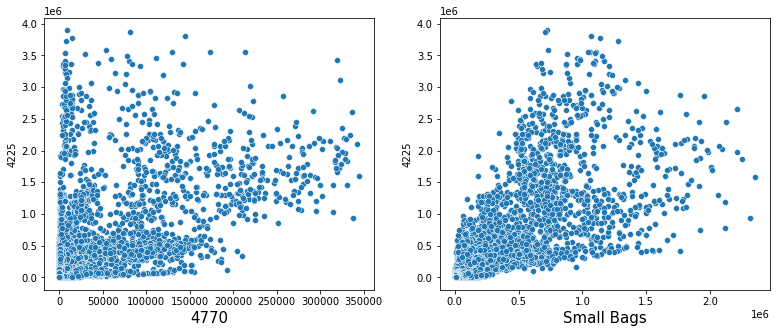

In [28]:
# Let's see the scatterplot of '4225' column vs '4770' and 'Small Bags' columns.
columns= df[['4770','Small Bags']]
plt.figure(figsize=(13,5))
plotnumber=1
for i in columns:
    if plotnumber<=2:
        ax= plt.subplot(1,2,plotnumber)
        sns.scatterplot(x=columns[i],y=df['4225'])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

# 'Small Bags' column have a positive relation with '4225' type of avocados.

In [29]:
# Let's check the skewness values of our columns with continuous data.
df_cont= df[['Type4 Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']]
df_cont.skew()

# Very high level of skewness can be seen.

Type4 Volume    4.082050
4046            4.928850
4225            4.472729
4770            5.137120
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
dtype: float64

In [30]:
# applying power-transformation on the columns to reduce skewness.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="yeo-johnson")

def power_transform(column):
    df[column]= pt.fit_transform(df[[column]])
    
columns= df[['Type4 Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']]
for i in columns:
    power_transform(i) 

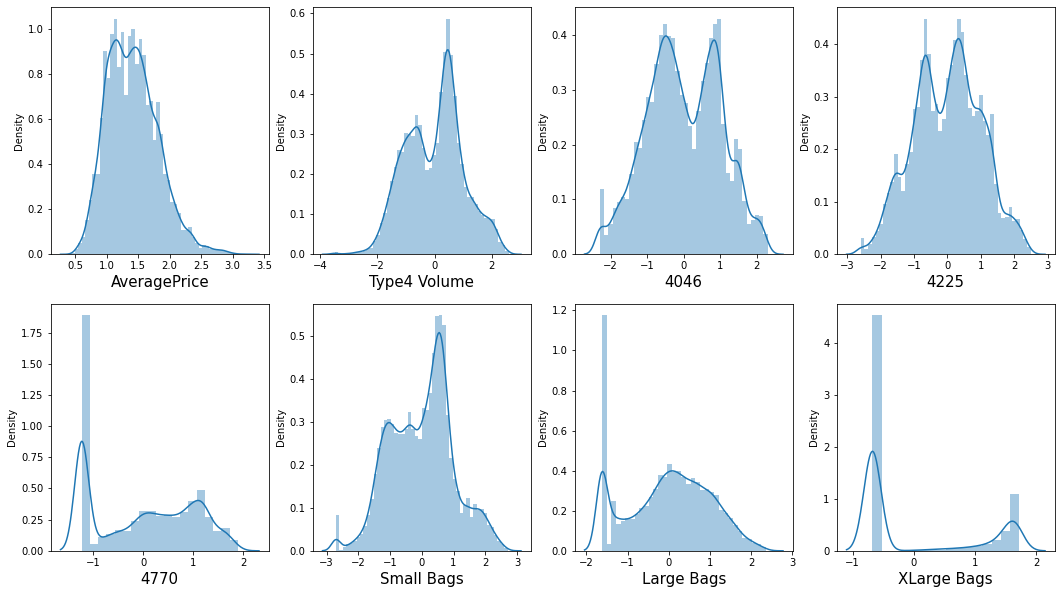

In [31]:
# Let's see how the distribution looks after applying power-transformation.
plt.figure(figsize=(18,10))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [32]:
# Let's check the skewness values after power-transformation.
df_cont= df[['Type4 Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']]
df_cont.skew()

Type4 Volume   -0.021532
4046           -0.038259
4225           -0.043246
4770            0.028015
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
dtype: float64

In [33]:
# Let's see the correlation of our features with the label.
corr["AveragePrice"]

# 'Day' and 'region' have a very weak relation with our target variable.

AveragePrice    1.000000
Type4 Volume   -0.295094
4046           -0.327348
4225           -0.243080
4770           -0.240676
Small Bags     -0.274138
Large Bags     -0.267604
XLarge Bags    -0.152351
type            0.608447
year            0.099910
region          0.010428
Month           0.157900
Day             0.024742
Name: AveragePrice, dtype: float64

In [34]:
# Separating target variable and features.
X= df.drop(columns=["AveragePrice"])
y= df["AveragePrice"]

# Scaling the data using Standard-Scaler.
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [35]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# 'Type4 Volume' and 'Small Bags' have a multicollinearity problem.

          vif      Features
0   24.489172  Type4 Volume
1    3.741910          4046
2    4.284823          4225
3    3.940730          4770
4   16.645381    Small Bags
5    3.422174    Large Bags
6    2.039754   XLarge Bags
7    3.502152          type
8    1.384614          year
9    1.079289        region
10   1.051860         Month
11   1.000683           Day


In [36]:
# dropping the 'Type4 Volume' column from the unscaled dataframe.
df.drop(columns=['Type4 Volume'],inplace=True)

In [37]:
# separating the label and features.
X= df.drop(columns=["AveragePrice"])
y= df["AveragePrice"]

# scaling the data using standard-scaler.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [38]:
# checking the vif scores again.
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# all the values seems to be under the acceptable level of 5.

         vif     Features
0   3.723160         4046
1   4.139977         4225
2   3.940502         4770
3   4.103569   Small Bags
4   1.866024   Large Bags
5   2.039339  XLarge Bags
6   3.498746         type
7   1.359839         year
8   1.079283       region
9   1.051207        Month
10  1.000506          Day


In [39]:
############################################### LINEAR REGRESSION ##############################################################

from sklearn.linear_model import LinearRegression
lr= LinearRegression()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    lr.fit(x_train,y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 50.99
Testing Score for sample 0 : 50.75
Mean Absolute Error 0.22
Root Mean Squared Error 0.29


Training Score for sample 1 : 50.72
Testing Score for sample 1 : 51.88
Mean Absolute Error 0.22
Root Mean Squared Error 0.28


Training Score for sample 2 : 51.14
Testing Score for sample 2 : 50.13
Mean Absolute Error 0.22
Root Mean Squared Error 0.28


Training Score for sample 3 : 50.89
Testing Score for sample 3 : 51.17
Mean Absolute Error 0.22
Root Mean Squared Error 0.28


Training Score for sample 4 : 51.15
Testing Score for sample 4 : 50.16
Mean Absolute Error 0.22
Root Mean Squared Error 0.29


Training Score for sample 5 : 51.11
Testing Score for sample 5 : 50.31
Mean Absolute Error 0.22
Root Mean Squared Error 0.28


Training Score for sample 6 : 50.86
Testing Score for sample 6 : 51.32
Mean Absolute Error 0.22
Root Mean Squared Error 0.28


Training Score for sample 7 : 50.99
Testing Score for sample 7 : 50.77
Mean Absolute Error 0.22
Root Mean Squar

In [40]:
############################################### ADABOOST REGRESSION ############################################################

from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    
    ada.fit(x_train, y_train)

    y_pred_train = ada.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= ada.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 57.34
Testing Score for sample 0 : 56.15
Mean Absolute Error 0.22
Root Mean Squared Error 0.27


Training Score for sample 1 : 55.98
Testing Score for sample 1 : 56.43
Mean Absolute Error 0.21
Root Mean Squared Error 0.26


Training Score for sample 2 : 56.1
Testing Score for sample 2 : 53.76
Mean Absolute Error 0.22
Root Mean Squared Error 0.27


Training Score for sample 3 : 55.67
Testing Score for sample 3 : 56.08
Mean Absolute Error 0.22
Root Mean Squared Error 0.27


Training Score for sample 4 : 54.88
Testing Score for sample 4 : 52.25
Mean Absolute Error 0.22
Root Mean Squared Error 0.28


Training Score for sample 5 : 55.29
Testing Score for sample 5 : 53.67
Mean Absolute Error 0.22
Root Mean Squared Error 0.27


Training Score for sample 6 : 57.2
Testing Score for sample 6 : 56.3
Mean Absolute Error 0.21
Root Mean Squared Error 0.27


Training Score for sample 7 : 56.81
Testing Score for sample 7 : 54.98
Mean Absolute Error 0.22
Root Mean Squared 

In [41]:
######################################### XTREME-GRADIENT BOOST REGRESSION #####################################################

import xgboost as xgb
xgb= xgb.XGBRegressor()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    xgb.fit(x_train,y_train)

    y_pred_train = xgb.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= xgb.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 95.81
Testing Score for sample 0 : 90.35
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 1 : 96.22
Testing Score for sample 1 : 90.17
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 2 : 96.08
Testing Score for sample 2 : 89.15
Mean Absolute Error 0.1
Root Mean Squared Error 0.13


Training Score for sample 3 : 95.96
Testing Score for sample 3 : 90.07
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 4 : 96.02
Testing Score for sample 4 : 90.2
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 5 : 96.13
Testing Score for sample 5 : 90.31
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 6 : 95.98
Testing Score for sample 6 : 89.89
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 7 : 96.18
Testing Score for sample 7 : 90.04
Mean Absolute Error 0.09
Root Mean Squared

In [42]:
############################################## RANDOM FOREST REGRESSION ########################################################

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_jobs=-1)

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
   
    rf.fit(x_train,y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 98.38
Testing Score for sample 0 : 89.13
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 1 : 98.44
Testing Score for sample 1 : 89.1
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 2 : 98.46
Testing Score for sample 2 : 87.81
Mean Absolute Error 0.1
Root Mean Squared Error 0.14


Training Score for sample 3 : 98.43
Testing Score for sample 3 : 89.63
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 4 : 98.41
Testing Score for sample 4 : 88.88
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 5 : 98.41
Testing Score for sample 5 : 88.97
Mean Absolute Error 0.09
Root Mean Squared Error 0.13


Training Score for sample 6 : 98.42
Testing Score for sample 6 : 88.6
Mean Absolute Error 0.09
Root Mean Squared Error 0.14


Training Score for sample 7 : 98.46
Testing Score for sample 7 : 88.86
Mean Absolute Error 0.09
Root Mean Squared 

In [43]:
############################################## K-NEIGHBORS REGRESSION ##########################################################

from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
   
    knr.fit(x_train,y_train)

    y_pred_train = knr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 86.39
Testing Score for sample 0 : 79.54
Mean Absolute Error 0.13
Root Mean Squared Error 0.18


Training Score for sample 1 : 86.89
Testing Score for sample 1 : 78.48
Mean Absolute Error 0.13
Root Mean Squared Error 0.19


Training Score for sample 2 : 86.55
Testing Score for sample 2 : 79.17
Mean Absolute Error 0.13
Root Mean Squared Error 0.18


Training Score for sample 3 : 86.53
Testing Score for sample 3 : 80.42
Mean Absolute Error 0.13
Root Mean Squared Error 0.18


Training Score for sample 4 : 86.65
Testing Score for sample 4 : 78.94
Mean Absolute Error 0.13
Root Mean Squared Error 0.19


Training Score for sample 5 : 86.61
Testing Score for sample 5 : 79.69
Mean Absolute Error 0.13
Root Mean Squared Error 0.18


Training Score for sample 6 : 86.61
Testing Score for sample 6 : 79.06
Mean Absolute Error 0.13
Root Mean Squared Error 0.19


Training Score for sample 7 : 86.69
Testing Score for sample 7 : 79.09
Mean Absolute Error 0.13
Root Mean Squar

In [251]:
# XGBoost is giving the best r2 score in testing results. 
# Let's try to tune it further.

from sklearn.model_selection import GridSearchCV

params= {"n_estimators": [500,750,1000,1250],
         "max_depth": [6,7,8],
         "learning_rate": [0.1,1],
         "min_child_weight":[1,2,3]         
         }

grd= GridSearchCV(xgb, param_grid=params,cv=5,n_jobs=-1)

grd.fit(x_train,y_train)
print("Best Parameters:",grd.best_params_)

Best Parameters: {'n_estimators': 1000 , 'max_depth': 7, 'learning_rate': 0.1, 'min_child_weight': 1}


In [44]:
# Taking the best sample split result and applying on the tuned model.
import xgboost as xgb
xgb_tuned= xgb.XGBRegressor(n_estimators=1000,max_depth=7,learning_rate=0.1,min_child_weight=1,n_jobs=-1)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=0)

xgb_tuned.fit(x_train,y_train)
y_pred_train = xgb_tuned.predict(x_train)
accuracy_train = r2_score(y_train,y_pred_train)
y_pred= xgb_tuned.predict(x_test)
accuracy_test = r2_score(y_test,y_pred)

print("Training Score for best sample",round(accuracy_train*100,2))
print("Testing Score for best sample:",round(accuracy_test*100,2))
print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

Training Score for best sample 99.73
Testing Score for best sample: 92.43
Mean Absolute Error 0.08
Root Mean Squared Error 0.11


In [50]:
# saving the model using pickle
import pickle 

Avocado= "Avocado_Regression_model.pickle"
pickle.dump(xgb_tuned, open(Avocado,'wb'))

# Now let's move forward to the classification task of predicting the 'region' 

In [51]:
# getting the data.
df= pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [52]:
# Repeating the preliminary steps that we did in the regression task above.

# dropping the 'Unnamed: 0' column as it is nominal data.
df.drop(columns='Unnamed: 0',inplace=True)

# applying the 'to_datetime' method of pandas to convert the 'Date' column into date-time format.
df['Date'] = pd.to_datetime(df['Date'],format ='%Y-%m-%d', dayfirst=True)

# extracting the month and day from the 'Date' column and making separate columns for them.
# the year is not extracted as there is already a separate column for year.
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# dropping the 'Date' column as the day,month and year are extracted now to separate columns.
df.drop(columns='Date',inplace=True)

# The 'Total Volume' column includes the volume of PLU 4046,PLU 4225,PLU 4770 too. 
# Hence let's substract their volume from the total and make a column for other types of avocado and call it "Type4 Volume"
df['Total Volume']= df['Total Volume'] - (df['4046']+df['4225']+df['4770'])
df.rename(columns = {'Total Volume':'Type4 Volume'}, inplace = True)
df.drop(columns=['Total Bags'],inplace=True)

# Let's encode the two object data-type columns using label-encoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
df["region"]= enc.fit_transform(df["region"])
df["type"]= enc.fit_transform(df["type"])

# removing outliers using zscore method.
from scipy.stats import zscore
z_score= zscore(df[['Type4 Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']])
abs_zscore= np.abs(z_score)
filtering_entry= (abs_zscore<3).all(axis=1)
df=df[filtering_entry]

# dropping the column with multicollinearity problem.
df.drop(columns=['Type4 Volume'],inplace=True)

In [53]:
# Let's see the correlation of the new target variable with our features.
corr= df.corr()
corr["region"]

# It can be seen that most of the features are very weakly related to the target variable.

AveragePrice    0.010428
4046            0.117225
4225            0.009466
4770           -0.096766
Small Bags      0.064024
Large Bags      0.125787
XLarge Bags    -0.045122
type            0.021970
year           -0.003610
region          1.000000
Month           0.002175
Day             0.000751
Name: region, dtype: float64

In [54]:
# dropping the 'Day', 'Month' and 'year' column as they have almost no relation with the target column.
df.drop(columns=['year','Day','Month'], inplace=True)

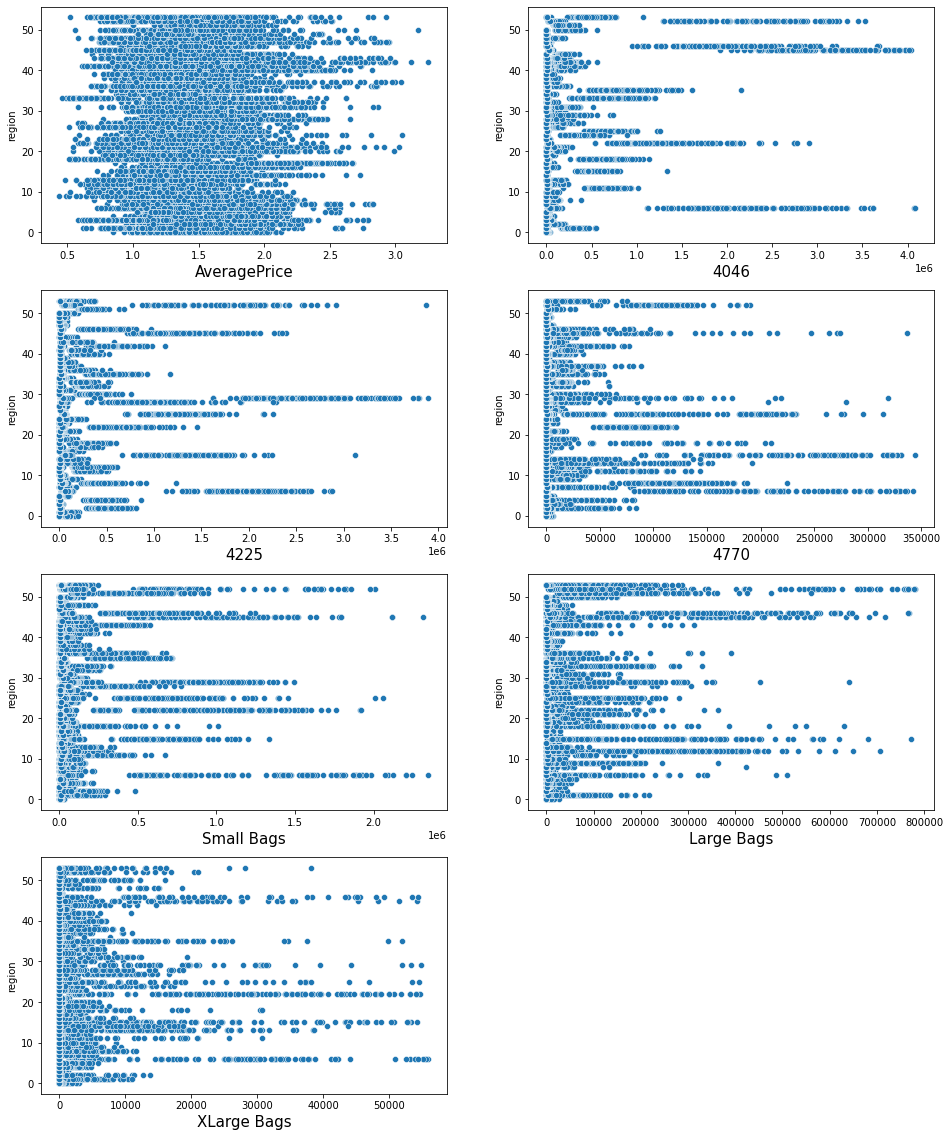

In [55]:
# Let's see the scatterplot of our continuous-data columns with our target variable('region')
columns= df[['AveragePrice','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']]
plt.figure(figsize=(16,20))
plotnumber=1
for i in columns:
    if plotnumber<=8:
        ax= plt.subplot(4,2,plotnumber)
        sns.scatterplot(x=columns[i],y=df['region'])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

# It can be seen that some regions have much higher sale of avocados as compared to others. 

In [56]:
# separating the label and features.
X= df.drop(columns=["region"])
y= df["region"]

# Scaling the data using Standard-Scaler.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [57]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# all values are under acceptable level.

        vif      Features
0  1.657172  AveragePrice
1  2.246819          4046
2  3.154134          4225
3  1.916188          4770
4  4.776781    Small Bags
5  1.680727    Large Bags
6  1.790544   XLarge Bags
7  1.781681          type


In [58]:
# Let's check the skewness values of our columns with continuous data.
df_cont= df[['AveragePrice','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']]
df_cont.skew()

# Very high level of skewness can be seen.

AveragePrice    0.560969
4046            4.928850
4225            4.472729
4770            5.137120
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
dtype: float64

In [59]:
# applying power-transformation on the columns to reduce skewness.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="yeo-johnson")

def power_transform(column):
    df[column]= pt.fit_transform(df[[column]])
    
columns= df[['AveragePrice','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']]
for i in columns:
    power_transform(i)

In [60]:
df.skew()

AveragePrice    0.004164
4046           -0.038259
4225           -0.043246
4770            0.028015
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
region          0.005773
dtype: float64

In [61]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)

    lr= LogisticRegression()
    lr.fit(x_train, y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 39.74
Testing Score for sample 0 : 38.64


Training Score for sample 1 : 40.0
Testing Score for sample 1 : 38.03


Training Score for sample 2 : 39.22
Testing Score for sample 2 : 37.88


Training Score for sample 3 : 38.68
Testing Score for sample 3 : 38.69


Training Score for sample 4 : 39.03
Testing Score for sample 4 : 38.98


Training Score for sample 5 : 39.01
Testing Score for sample 5 : 39.83


Training Score for sample 6 : 39.9
Testing Score for sample 6 : 38.37


Training Score for sample 7 : 39.76
Testing Score for sample 7 : 37.88


Training Score for sample 8 : 39.24
Testing Score for sample 8 : 39.32


Training Score for sample 9 : 38.8
Testing Score for sample 9 : 38.53




In [62]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs=-1)

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
  
    rf.fit(x_train, y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")
    

Training Score for sample 0 : 100.0
Testing Score for sample 0 : 89.56


Training Score for sample 1 : 100.0
Testing Score for sample 1 : 90.15


Training Score for sample 2 : 100.0
Testing Score for sample 2 : 89.43


Training Score for sample 3 : 100.0
Testing Score for sample 3 : 89.16


Training Score for sample 4 : 100.0
Testing Score for sample 4 : 89.43


Training Score for sample 5 : 100.0
Testing Score for sample 5 : 88.93


Training Score for sample 6 : 100.0
Testing Score for sample 6 : 90.04


Training Score for sample 7 : 100.0
Testing Score for sample 7 : 89.68


Training Score for sample 8 : 100.0
Testing Score for sample 8 : 89.36


Training Score for sample 9 : 100.0
Testing Score for sample 9 : 89.65




In [63]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i) 
    
    knn.fit(x_train, y_train)

    y_pred_train = knn.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knn.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")

Training Score for sample 0 : 71.43
Testing Score for sample 0 : 55.65


Training Score for sample 1 : 71.05
Testing Score for sample 1 : 56.14


Training Score for sample 2 : 71.21
Testing Score for sample 2 : 55.74


Training Score for sample 3 : 71.24
Testing Score for sample 3 : 55.2


Training Score for sample 4 : 70.73
Testing Score for sample 4 : 56.88


Training Score for sample 5 : 70.76
Testing Score for sample 5 : 56.23


Training Score for sample 6 : 71.45
Testing Score for sample 6 : 55.47


Training Score for sample 7 : 70.43
Testing Score for sample 7 : 56.34


Training Score for sample 8 : 70.81
Testing Score for sample 8 : 56.41


Training Score for sample 9 : 71.05
Testing Score for sample 9 : 57.26




In [157]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
svc= SVC()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
      
    svc.fit(x_train, y_train)

    y_pred_train = svc.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= svc.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 79.09
Testing Score for sample 0 : 77.4


Training Score for sample 1 : 78.67
Testing Score for sample 1 : 77.78


Training Score for sample 2 : 79.06
Testing Score for sample 2 : 76.52


Training Score for sample 3 : 79.17
Testing Score for sample 3 : 76.54


Training Score for sample 4 : 79.01
Testing Score for sample 4 : 76.97


Training Score for sample 5 : 78.65
Testing Score for sample 5 : 76.77


Training Score for sample 6 : 78.52
Testing Score for sample 6 : 77.28


Training Score for sample 7 : 78.82
Testing Score for sample 7 : 77.17


Training Score for sample 8 : 79.16
Testing Score for sample 8 : 76.9


Training Score for sample 9 : 79.23
Testing Score for sample 9 : 76.79




In [ ]:
# Based on the accuracy-scores, Random-Forests CLassifier is working best on our dataset.
# So, let's move ahead with it and try to tune it further.

In [73]:
#Hyperparameter tuning of Random Forests Classifier using GridSearchCV.

params= {"n_estimators": np.arange(100,600,100),
         "criterion":['gini', 'entropy'],
         "max_depth":[15,18,20,23,25]
         "min_samples_split": range(2,4)        
         }
grd_rf= GridSearchCV(rf, param_grid=params,cv=5,n_jobs=-1)
grd_rf.fit(x_train,y_train)
print("Best Parameters:",grd_rf.best_params_)

Best Parameters: {'n_estimators': 500, 'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 2}


In [75]:
# Taking the best sample split result and applying on the tuned Random Forests model.

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1,stratify=y)
rf_tuned = RandomForestClassifier(n_jobs=-1, n_estimators=500, criterion='gini', max_depth=25, min_samples_split=2)
rf_tuned.fit(x_train, y_train)
    
y_pred_train = rf_tuned.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Training Score:",round(accuracy_train*100,2))

y_pred= rf_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++","\n")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")

print("++++++++++++++ CROSS VALIDATION ++++++++++++++++","\n")
for i in range(5,10):
    cv_score= cross_val_score(rf_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

Training Score: 100.0
Testing Score: 90.31 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++ 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        85
           1       0.87      0.88      0.88        85
           2       0.98      0.98      0.98        84
           3       0.86      0.85      0.85        84
           4       0.91      0.93      0.92        84
           5       0.86      0.78      0.81        85
           6       0.99      1.00      0.99        72
           7       0.95      0.94      0.95        85
           8       0.97      0.98      0.97        85
           9       0.92      0.86      0.89        85
          10       0.84      0.85      0.84        85
          11       0.92      0.94      0.93        85
          12       0.96      0.93      0.95        85
          13       0.85      0.86      0.85        85
          14       0.81      0.89      0.85        85
          15       1.00      0.97 

In [76]:
# saving the model using pickle
import pickle 

Avocado_classif= "Avocado_Classif_model.pickle"
pickle.dump(rf_tuned, open(Avocado_classif,'wb'))